In [1]:
import datetime
import re

import numpy
import pandas
import matplotlib.pyplot
import matplotlib.dates

dfany = pandas.read_csv("pip-counts-any.csv", parse_dates=[0], infer_datetime_format=True)
dfsci = pandas.read_csv("pip-counts-scientific-linux.csv", parse_dates=[0], infer_datetime_format=True)
dfos = pandas.read_csv("pip-counts-by-os.csv", parse_dates=[0], infer_datetime_format=True)

In [2]:
# FIXME: change the order of the columns so that iminuit is last (so that the colors are stable.)

def plotit(df, vertical, title, selection, islog=True, dropminuit=False):
    if dropminuit:
        df = df[df["project"] != "iminuit"]
    if selection is not None:
        df = df[df["os"] == selection]
    ax = df.groupby(["date", "project"])["count"].sum().unstack().fillna(0).rolling(30).mean().plot(figsize=(10, 4))
    matplotlib.pyplot.title(title)
    if islog:
        matplotlib.pyplot.yscale("log")
    matplotlib.pyplot.xlabel("")
    matplotlib.pyplot.ylabel("pip-installs/day, 30-day moving average")
    handles, labels = ax.get_legend_handles_labels()
    order = ["numpy", "matplotlib", "pandas", "uproot", "awkward", "iminuit"]
    if dropminuit:
        order = order[:-1]
    ax.legend([handles[labels.index(x)] for x in order], order, loc="upper left", frameon=False)
    ax.set_xlim((datetime.date(2015, 7, 1), datetime.date(2019, 10, 22)))
    ax.set_ylim((0.01, vertical))
    ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

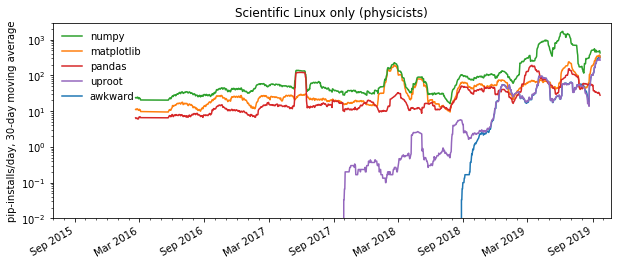

In [3]:
plotit(dfsci, 3000, "Scientific Linux only (physicists)", None, dropminuit=True)

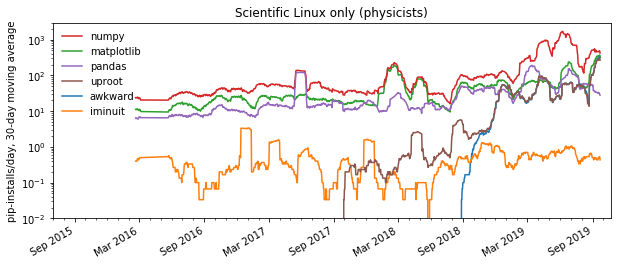

In [4]:
plotit(dfsci, 3000, "Scientific Linux only (physicists)", None)

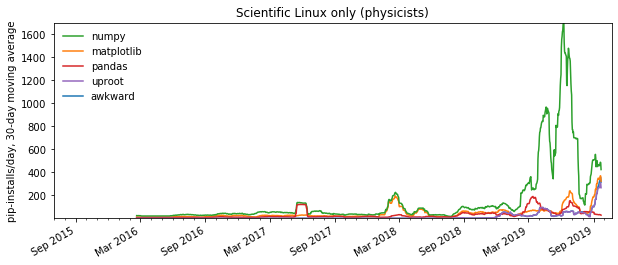

In [29]:
plotit(dfsci, 1700, "Scientific Linux only (physicists)", None, dropminuit=True, islog=False)

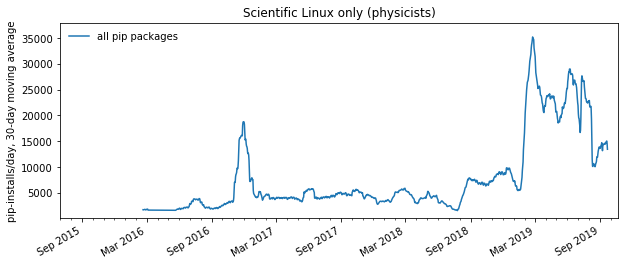

In [6]:
ax = dfany.groupby(["date"])["count"].sum().rolling(30).mean().plot(figsize=(10, 4))
matplotlib.pyplot.title("Scientific Linux only (physicists)")
matplotlib.pyplot.xlabel("")
matplotlib.pyplot.ylabel("pip-installs/day, 30-day moving average")
handles, labels = ax.get_legend_handles_labels()
ax.legend(["all pip packages"], loc="upper left", frameon=False)
ax.set_xlim((datetime.date(2015, 7, 1), datetime.date(2019, 10, 22)))
ax.set_ylim((0.01, 38000))
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

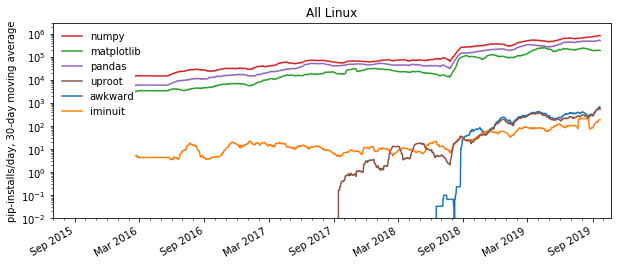

In [7]:
plotit(dfos, 3000000, "All Linux", "Linux")

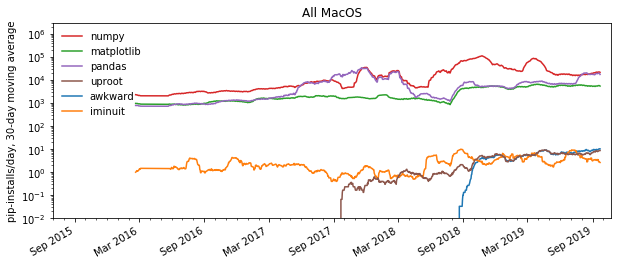

In [8]:
plotit(dfos, 3000000, "All MacOS", "Darwin")

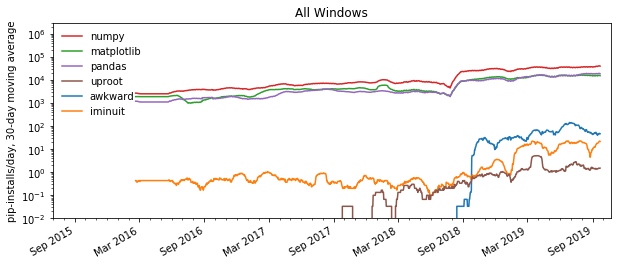

In [9]:
plotit(dfos, 3000000, "All Windows", "Windows")

In [136]:
dfos.groupby(["os"]).count().sort_values("count", ascending=False);

In [11]:
dfgit = pandas.read_csv("github-cmssw.csv", parse_dates=[3], infer_datetime_format=True)
dfgit.columns

Index(['repo', 'owner', 'isfork', 'created', 'language'], dtype='object')

In [27]:
dfgit["lang"] = dfgit["language"].apply(lambda x: {
    "'C++'": "C/C++", "'C'": "C/C++", "'C#'": "C/C++", "'Objective-C'": "C/C++",
    "'Python'": "Python",
    "'Jupyter Notebook'": "Jupyter",
    "'TeX'": "TeX/LaTeX",
    "'Java'": "Java",
    "'R'": "R",
    "'VHDL'": "VHDL/Verilog", "'Verilog'": "VHDL/Verilog",
    "'Fortran'": "Fortran", "'FORTRAN'": "Fortran",
    "'Julia'": "Julia",
    "'Go'": "Go",
    "None": "(unknown)",
    }.get(x, "(other)"))

In [28]:
dfgit.groupby("lang").count().sort_values("repo", ascending=False)

,repo,owner,isfork,created,language
lang,,,,,
C/C++,13832,13832,13832,13832,13832
Python,8870,8870,8870,8870,8870
(other),4674,4674,4674,4674,4674
(unknown),4523,4523,4523,4523,4523
Jupyter,1578,1578,1578,1578,1578
Java,722,722,722,722,722
TeX/LaTeX,634,634,634,634,634
Go,231,231,231,231,231
VHDL/Verilog,155,155,155,155,155
